In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import matplotlib.pyplot as plt

from latex_decompiler.monitoring import plot_accuracies
from pixel_art.analysis.pixel_art_experiment import all_pixel_art_errors_above_line, sparsity

In [4]:
from pixel_art.analysis.l1_results import l1_names, compute_l1_results, scatterplot, table

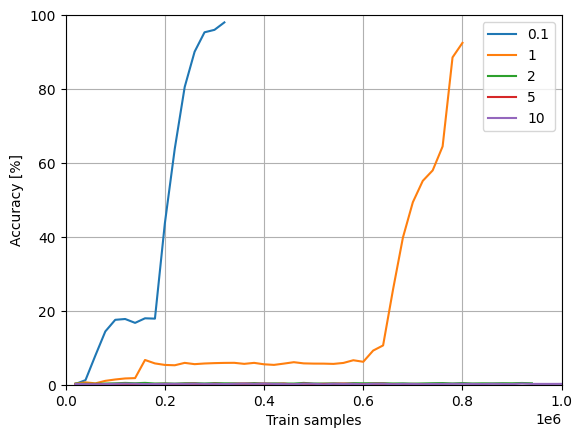

In [5]:
for k in l1_names:
    plot_accuracies(plt.gca(), l1_names[k], label=k)
plt.legend()
plt.xlim(0, 1e6)
# plt.ylim(0, 10)
plt.show()

In [6]:
l1_errs, l1_densities = compute_l1_results()

In [7]:
sparling_errs = all_pixel_art_errors_above_line(0)["MT"]
sparling_density = sparsity(0) * 100

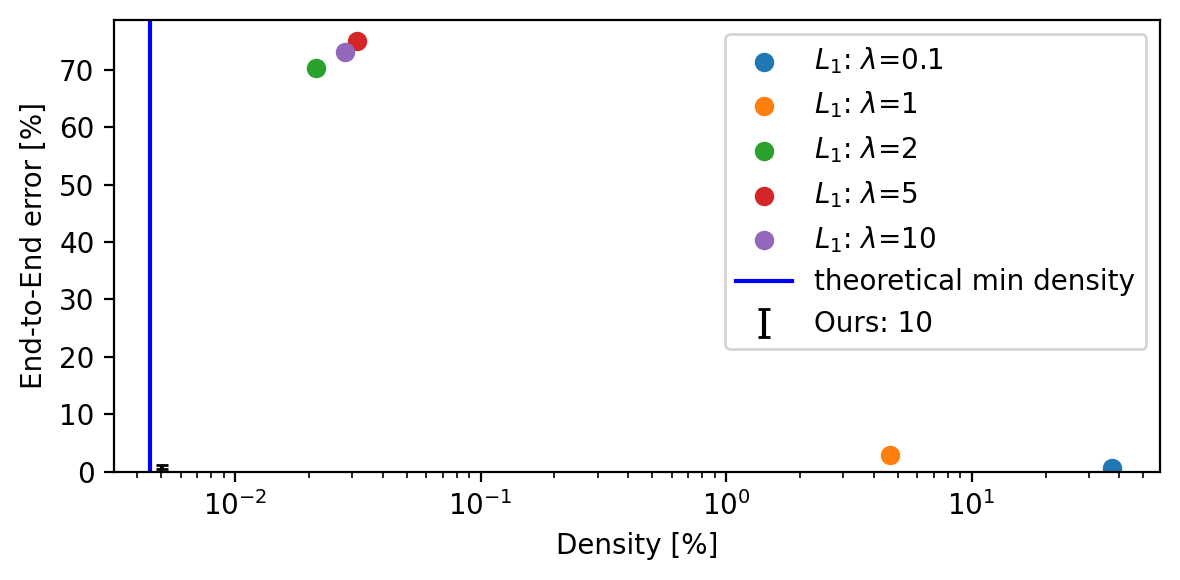

In [8]:
scatterplot(l1_errs, l1_densities, sparling_errs, sparling_density)

In [9]:
t = table(l1_errs, l1_densities, sparling_errs, sparling_density)

In [10]:
t

$L_1$                                            \
             $\lambda = 0.1$ $\lambda = 1$ $\lambda = 2$ $\lambda = 5$   
FPE [\%]               99.99         99.90         91.25         95.99   
FNE [\%]                0.00          0.00         58.09         73.12   
CE [\%]                50.34         47.84         45.65         50.85   
E2EE [\%]               0.68          2.85         70.31         75.00   
Density [\%]              37           4.6         0.021         0.031   

                            \textsc{Sparling}  
             $\lambda = 10$     $\mathrm{MT}$  
FPE [\%]              97.63  1.48 [0.07-4.23]  
FNE [\%]              84.51  0.42 [0.25-0.67]  
CE [\%]               33.82  1.16 [0.03-3.39]  
E2EE [\%]             73.20  0.74 [0.47-1.15]  
Density [\%]          0.028             0.005

In [11]:
print(t.to_latex(escape=False, column_format="l" + "r" * len(t.columns)))

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{5}{l}{$L_1$} & \textsc{Sparling} \\
{} & $\lambda = 0.1$ & $\lambda = 1$ & $\lambda = 2$ & $\lambda = 5$ & $\lambda = 10$ &     $\mathrm{MT}$ \\
\midrule
FPE [\%]     &           99.99 &         99.90 &         91.25 &         95.99 &          97.63 &  1.48 [0.07-4.23] \\
FNE [\%]     &            0.00 &          0.00 &         58.09 &         73.12 &          84.51 &  0.42 [0.25-0.67] \\
CE [\%]      &           50.34 &         47.84 &         45.65 &         50.85 &          33.82 &  1.16 [0.03-3.39] \\
E2EE [\%]    &            0.68 &          2.85 &         70.31 &         75.00 &          73.20 &  0.74 [0.47-1.15] \\
Density [\%] &              37 &           4.6 &         0.021 &         0.031 &          0.028 &             0.005 \\
\bottomrule
\end{tabular}

